In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

The 'Banknote Authentication Dataset' has been downloaded from this website :  https://archive.ics.uci.edu/ml/datasets/banknote+authentication
(date of donwload : November 27, 2021)
The dataset, we used is available on our Git. 

The 'Chronic Kidney Disease' dataset has been downloaded from this website :  https://www.kaggle.com/mansoordaku/ckdisease
(date of donwload : November 27, 2021)
The dataset, we used is available on our Git. 


# 1. Import the datasets


### Banknote Authentification Dataset 

**Import the 'Banknote Authentication Dataset' Data-Set ( data_banknote_authentication.txt )**

Attribute Information (list of the five variables in the dataset):

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

In [3]:
# #Reading the banknote authentication dataset
banknotes = pd.read_csv('data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)

**Getting a better understanding of the dataset**

In [4]:
# Indicates the numbers of rows and columns present in our dataset
banknotes.shape

(1371, 5)

In [5]:
# Showcases the first rows of our dataset
banknotes.head()

,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [6]:
# Displaying information on our data
banknotes.info()
banknotes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   curtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Chronic Kidney Disease dataset

**Import the 'Chronic Kidney Disease' Data-Set ( Kidney_Disease.csv )**

In [7]:
# Reading the chronic kidney disease dataset
kidney = pd.read_csv('kidney_disease.csv')

**Getting a better understanding of the dataset**

In [8]:
# Indicates the numbers of rows and columns present in our dataset
kidney.shape

(400, 26)

In [9]:
# Showcases the first rows of our dataset
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
# Displaying information on our data
kidney.info()
kidney.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Clean the dataset and perform pre-processing

### Banknote Authentification Dataset 

Remove the "ground-truth" column and store its values aside

In [11]:
y_bkn = banknotes["class"]
banknotes = banknotes.drop(columns="class")

In [12]:
# Check the number of missing values in our data for each variable
banknotes.isna().sum(axis=0)

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

- **There is no missing values in this dataset !**

In [13]:
# Check if all variables are accounted as numerical ones 
bkn_num_col = []
bkn_not_num_col = []
for col in banknotes.columns:
    if banknotes[col].dtype==np.int64 or banknotes[col].dtype==np.float64:
        bkn_num_col.append(col)
    else:
        bkn_not_num_col.append(col)
print('This is the numerical columns of our dataset :','\n',bkn_num_col)
print('This is the non numerical columns of our dataset :','\n',bkn_not_num_col)

This is the numerical columns of our dataset : 
 ['variance', 'skewness', 'curtosis', 'entropy']
This is the non numerical columns of our dataset : 
 []


- **Center and normalize the data**

In [14]:
for col in bkn_num_col:
    banknotes[col] = (banknotes[col] - banknotes[col].mean()) / (banknotes[col].std())

banknotes

,variance,skewness,curtosis,entropy
0,1.447493,1.065028,-0.895406,-0.128421
1,1.208301,-0.776322,0.121460,0.617909
2,1.064273,1.295995,-1.255629,-1.142989
3,-0.035944,-1.085931,0.735738,0.096779
4,1.385048,1.321386,-1.243890,-0.937487
...,...,...,...,...
1366,-0.008890,-0.096830,-0.661421,0.301049
1367,-0.640321,-1.157859,1.177861,0.729886
1368,-1.471141,-2.620159,3.756871,-0.754110
1369,-1.405494,-1.755199,2.550357,-0.042871


### Chronic Kidney Disease dataset

Depending on whether a variable is numerical or not our approach for pre-processing it differs. So we need to discriminate the columns on their type first. 

In [15]:
# Drop the 'id' column which does not bring any information
kidney.drop('id',inplace=True,axis=1)

In [16]:
# Separating the numerical variables from the non numerical variables 
kdn_num_col = []
kdn_not_num_col = []
for col in kidney.columns:
    if kidney[col].dtype==np.int64 or kidney[col].dtype==np.float64:
        kdn_num_col.append(col)
    else:
        kdn_not_num_col.append(col)
print('This is the numerical columns of our dataset :','\n',kdn_num_col)
print('This is the non numerical columns of our dataset :','\n',kdn_not_num_col)

This is the numerical columns of our dataset : 
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
This is the non numerical columns of our dataset : 
 ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


- **Cleaning dirtiness in the data**

In [17]:
# Highlighting dirtiness in non numerical data
for col in kdn_not_num_col:
    print('{} has {} values'.format(col,kidney[col].unique()),'\n')

rbc has [nan 'normal' 'abnormal'] values 

pc has ['normal' 'abnormal' nan] values 

pcc has ['notpresent' 'present' nan] values 

ba has ['notpresent' 'present' nan] values 

pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 

wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'

We can see that pcv, wc and rc are in fact numerical variables, but due to some input errors they have been classified as non numerical variables. So we correct the input errors, verify that they are now numerical variables and add them to our list of numerical variables. 

We can also spot some input errors in the trully non numerical variables, so we correct it also. 

In [18]:
# Corrects the input errors in the non numerical variables
kidney['pcv'].replace(to_replace={'\t43':'43','\t?':np.nan,'?':np.nan},inplace=True)
kidney['wc'].replace(to_replace={'\t6200':'6200','\t8400':'8400','\t?':np.nan,'?':np.nan},inplace=True)
kidney['rc'].replace(to_replace={'\t?':np.nan,'?':np.nan},inplace=True)
# Convert them to numerical variables
kidney['pcv'] = pd.to_numeric (kidney['pcv'])
kidney['wc'] = pd.to_numeric (kidney['wc'])
kidney['rc'] = pd.to_numeric (kidney['rc'])
# Add them to our list of numerical variables and remove them from the other list
kdn_num_col.append('pcv')
kdn_num_col.append('wc')
kdn_num_col.append('rc')
kdn_not_num_col.remove('pcv')
kdn_not_num_col.remove('wc')
kdn_not_num_col.remove('rc')
# Corrects the input errors in the non numerical variables
kidney['dm'].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
kidney['cad'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [19]:
# No more dirtiness in non numerical data
for col in kdn_not_num_col:
    print('{} has {} values'.format(col,kidney[col].unique()),'\n')

rbc has [nan 'normal' 'abnormal'] values 

pc has ['normal' 'abnormal' nan] values 

pcc has ['notpresent' 'present' nan] values 

ba has ['notpresent' 'present' nan] values 

htn has ['yes' 'no' nan] values 

dm has ['yes' 'no' nan] values 

cad has ['no' 'yes' nan] values 

appet has ['good' 'poor' nan] values 

pe has ['no' 'yes' nan] values 

ane has ['no' 'yes' nan] values 

classification has ['ckd' 'notckd'] values 



Remove the "ground-truth" column and store its values aside

In [20]:
y_kdn = kidney["classification"]
kidney = kidney.drop(columns="classification")

- **Replace missing values by average or median values**

In [21]:
# Check the number of missing values in our data for each variable
kidney.isna().sum(axis=0)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [22]:
# Replace missing values by average values for numerical variables
for col in kdn_num_col:
    kidney[col].fillna(kidney[col].mean(),inplace=True)

# Replace missing values by the most frequent value for non numerical variables.
# To preserve the categorical aspect of the variables 
kdn_not_num_col.remove('classification')
for col in kdn_not_num_col:
    kidney[col].fillna(kidney[col].value_counts().index[0],inplace=True)

In [23]:
# No more missing values
kidney.isna().sum(axis=0)

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [24]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,15.7,47.0,6700.0,4.900000,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,16.5,54.0,7800.0,6.200000,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,15.8,49.0,6600.0,5.400000,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,14.2,51.0,7200.0,5.900000,no,no,no,good,no,no


- **Center and normalize the data**

In [25]:
# There is no need to normalize categorical variables.
for col in kdn_num_col:
    kidney[col] = (kidney[col] - kidney[col].mean()) / (kidney[col].std())

kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.205207,0.262010,0.482750,-0.013321,-0.437249,normal,normal,notpresent,notpresent,-0.361535,...,1.057946,0.627586,-0.240218,5.861676e-01,yes,yes,no,good,no,no
1,-2.620528,-1.964120,0.482750,2.344580,-0.437249,normal,normal,notpresent,notpresent,0.000000,...,-0.451531,-0.108513,-0.953592,-1.056960e-15,no,no,no,good,no,no
2,0.619537,0.262010,-1.379663,0.772646,2.476824,normal,normal,notpresent,notpresent,3.676836,...,-1.077412,-0.967295,-0.359114,-1.056960e-15,no,yes,no,poor,no,yes
3,-0.205207,-0.480033,-2.310870,2.344580,-0.437249,normal,abnormal,present,notpresent,-0.415023,...,-0.488348,-0.844612,-0.676169,-9.608725e-01,yes,no,no,poor,yes,yes
4,-0.028476,0.262010,-1.379663,0.772646,-0.437249,normal,normal,notpresent,notpresent,-0.562116,...,-0.341082,-0.476562,-0.438377,-1.278509e-01,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207165,0.262010,0.482750,-0.799289,-0.437249,normal,normal,notpresent,notpresent,-0.107465,...,1.168396,0.995635,-0.676169,2.291584e-01,no,no,no,good,no,no
396,-0.558668,-0.480033,1.413957,-0.799289,-0.437249,normal,normal,notpresent,notpresent,-0.976651,...,1.462928,1.854417,-0.240218,1.776199e+00,no,no,no,good,no,no
397,-2.325977,0.262010,0.482750,-0.799289,-0.437249,normal,normal,notpresent,notpresent,-0.642349,...,1.205212,1.241001,-0.715801,8.241738e-01,no,no,no,good,no,no
398,-2.031425,-1.222077,1.413957,-0.799289,-0.437249,normal,normal,notpresent,notpresent,-0.455139,...,0.616148,1.486367,-0.478009,1.419189e+00,no,no,no,good,no,no


Transforms non numerical variables to one-hot encoded variables

In [26]:
# One-hot encodes non numerical features
le = LabelEncoder()
for col in kdn_not_num_col:
    kidney[col]=le.fit_transform(kidney[col])
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.205207,0.262010,0.482750,-0.013321,-0.437249,1,1,0,0,-0.361535,...,1.057946,0.627586,-0.240218,5.861676e-01,1,1,0,0,0,0
1,-2.620528,-1.964120,0.482750,2.344580,-0.437249,1,1,0,0,0.000000,...,-0.451531,-0.108513,-0.953592,-1.056960e-15,0,0,0,0,0,0
2,0.619537,0.262010,-1.379663,0.772646,2.476824,1,1,0,0,3.676836,...,-1.077412,-0.967295,-0.359114,-1.056960e-15,0,1,0,1,0,1
3,-0.205207,-0.480033,-2.310870,2.344580,-0.437249,1,0,1,0,-0.415023,...,-0.488348,-0.844612,-0.676169,-9.608725e-01,1,0,0,1,1,1
4,-0.028476,0.262010,-1.379663,0.772646,-0.437249,1,1,0,0,-0.562116,...,-0.341082,-0.476562,-0.438377,-1.278509e-01,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207165,0.262010,0.482750,-0.799289,-0.437249,1,1,0,0,-0.107465,...,1.168396,0.995635,-0.676169,2.291584e-01,0,0,0,0,0,0
396,-0.558668,-0.480033,1.413957,-0.799289,-0.437249,1,1,0,0,-0.976651,...,1.462928,1.854417,-0.240218,1.776199e+00,0,0,0,0,0,0
397,-2.325977,0.262010,0.482750,-0.799289,-0.437249,1,1,0,0,-0.642349,...,1.205212,1.241001,-0.715801,8.241738e-01,0,0,0,0,0,0
398,-2.031425,-1.222077,1.413957,-0.799289,-0.437249,1,1,0,0,-0.455139,...,0.616148,1.486367,-0.478009,1.419189e+00,0,0,0,0,0,0


# 3. Split the dataset

### Banknote Authentification Dataset 

**Split the dataset**

- **Split the dataset between training set and test set**

In [27]:
X_train_bkn,X_test_bkn,y_train_bkn,y_test_bkn = train_test_split (banknotes,y_bkn,test_size = 0.3)

In [28]:
X_train_bkn

,variance,skewness,curtosis,entropy
28,1.568759,-0.899031,0.468551,1.086129
782,0.014871,0.245906,-1.370522,-1.356484
177,-0.198013,-0.629637,1.608060,0.734811
407,1.333895,-0.133859,-0.157461,1.024598
1106,0.277358,0.030803,-1.066353,0.628368
...,...,...,...,...
351,-0.035958,-1.085931,0.735738,0.096779
842,-0.336979,-0.369056,-0.430807,0.766804
862,-0.080651,0.000130,-1.086631,0.273362
1205,-1.008378,-1.902940,1.761327,0.329350


- **Training set preparation for K-Fold cross-validation**

In [29]:
n_splits = 10

# Shuffling there is not mandatory since train_test_split already shuffle the data 
# but we still decided to use it
kf = KFold(n_splits=n_splits, shuffle=True, random_state=34) 

K_Fold_X_train_bkn = []
K_Fold_X_valid_bkn = []
K_Fold_y_train_bkn = []
K_Fold_y_valid_bkn = []

for train_index, test_index in kf.split(X_train_bkn):
    X_cross_train_bkn, X_valid_bkn = X_train_bkn.iloc[train_index], X_train_bkn.iloc[test_index]
    y_cross_train_bkn, y_valid_bkn = y_train_bkn.iloc[train_index], y_train_bkn.iloc[test_index]
    
    K_Fold_X_train_bkn.append(X_cross_train_bkn)
    K_Fold_X_valid_bkn.append(X_valid_bkn)
    K_Fold_y_train_bkn.append(y_cross_train_bkn)
    K_Fold_y_valid_bkn.append(y_valid_bkn)

In [30]:
K_Fold_X_train_bkn[0] 

,variance,skewness,curtosis,entropy
28,1.568759,-0.899031,0.468551,1.086129
782,0.014871,0.245906,-1.370522,-1.356484
177,-0.198013,-0.629637,1.608060,0.734811
407,1.333895,-0.133859,-0.157461,1.024598
1260,-0.824280,-1.376490,0.975685,0.798184
...,...,...,...,...
351,-0.035958,-1.085931,0.735738,0.096779
842,-0.336979,-0.369056,-0.430807,0.766804
862,-0.080651,0.000130,-1.086631,0.273362
1205,-1.008378,-1.902940,1.761327,0.329350


In [31]:
K_Fold_X_valid_bkn[0]

,variance,skewness,curtosis,entropy
1106,0.277358,0.030803,-1.066353,0.628368
525,0.625398,0.943733,-0.633185,-1.003910
916,0.398133,-0.174060,-0.782091,0.878781
90,1.277677,0.283992,-0.156665,0.755114
206,0.749022,1.252627,-1.158207,-0.077938
...,...,...,...,...
690,0.048968,-0.330967,-0.036796,0.299807
335,1.243482,0.341470,-0.161238,0.727426
533,1.546666,0.995571,-0.893202,-0.013989
146,0.463744,-0.356715,0.877474,1.182100


In [32]:
K_Fold_y_train_bkn[0]

28      0
782     1
177     0
407     0
1260    1
       ..
351     0
842     1
862     1
1205    1
910     1
Name: class, Length: 863, dtype: int64

### Chronic Kidney Disease dataset

**Split the dataset**

- **Split the dataset between training set and test set**

In [33]:
X_train_kdn,X_test_kdn,y_train_kdn,y_test_kdn = train_test_split (kidney,y_kdn,test_size = 0.3)

- **Training set preparation for K-Fold cross-validation**

In [34]:
n_splits = 10

# Shuffling there is not mandatory since train_test_split already shuffle the data 
# but we still decided to use it
kf = KFold(n_splits=n_splits, shuffle=True, random_state=34) 

K_Fold_X_train_kdn = []
K_Fold_X_valid_kdn = []
K_Fold_y_train_kdn = []
K_Fold_y_valid_kdn = []

for train_index, test_index in kf.split(X_train_kdn):
    X_cross_train_kdn, X_valid_kdn = X_train_kdn.iloc[train_index], X_train_kdn.iloc[test_index]
    y_cross_train_kdn, y_valid_kdn = y_train_kdn.iloc[train_index], y_train_kdn.iloc[test_index]
    
    K_Fold_X_train_kdn.append(X_cross_train_kdn)
    K_Fold_X_valid_kdn.append(X_valid_kdn)
    K_Fold_y_train_kdn.append(y_cross_train_kdn)
    K_Fold_y_valid_kdn.append(y_valid_kdn)

In [35]:
K_Fold_X_train_kdn[0]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
268,4.185827e-16,0.262010,0.000000,0.000000,-5.392118e-17,1,1,0,0,-0.642349,...,1.389295,1.731734,0.037205,2.291584e-01,0,0,0,0,0,0
320,3.249859e-01,-1.222077,0.482750,-0.799289,-4.372493e-01,1,1,0,0,-0.575488,...,1.168396,0.627586,0.790212,1.776199e+00,0,0,0,0,0,0
196,-1.462964e-01,1.746097,-1.379663,1.558613,-4.372493e-01,0,0,0,0,-0.254558,...,-1.629660,-1.826077,0.473156,-1.436885e+00,1,1,0,1,1,1
151,1.444281e+00,1.004054,0.000000,0.000000,-5.392118e-17,1,1,0,0,0.320442,...,-1.077412,-1.089978,0.000000,-1.056960e-15,1,1,0,0,0,1
74,2.660756e-01,1.004054,-0.448456,0.772646,-4.372493e-01,0,0,0,0,-0.254558,...,-1.261495,-1.212661,-0.795064,-1.555888e+00,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,-6.764889e-01,0.262010,0.482750,-0.799289,-4.372493e-01,1,1,0,0,-0.388279,...,0.000000,0.000000,0.000000,-1.056960e-15,0,0,0,0,0,0
237,1.679922e+00,-0.480033,-0.448456,0.772646,1.505466e+00,1,1,0,0,-0.094093,...,0.063900,0.136853,0.473156,-1.056960e-15,1,1,0,1,1,0
344,7.373578e-01,-1.222077,0.482750,-0.799289,-4.372493e-01,1,1,0,0,-0.562116,...,0.689781,0.382219,-0.121322,-8.847813e-03,0,0,0,0,0,0
211,1.482550e-01,3.230185,-0.448456,-0.799289,-4.372493e-01,1,1,0,0,-0.602232,...,0.000000,0.000000,0.000000,-1.056960e-15,0,0,0,0,0,0


In [36]:
K_Fold_X_valid_kdn[0]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
159,4.428064e-01,2.620102e-01,-1.379663,-0.013321,-4.372493e-01,0,1,0,0,2.072185,...,-0.782880,-0.476562,0.988371,-4.848602e-01,0,1,0,1,0,0
52,8.934475e-02,1.004054e+00,-0.448456,-0.799289,-4.372493e-01,1,1,0,0,0.000000,...,-0.598798,-0.599245,-1.627334,-1.198879e+00,0,0,0,1,0,1
53,6.195373e-01,2.620102e-01,-0.448456,-0.799289,4.419539e+00,1,1,0,0,1.309976,...,0.395249,0.136853,0.037205,-8.847813e-03,1,1,0,0,0,0
183,-1.265592e+00,-4.800333e-01,-0.448456,-0.799289,-4.372493e-01,1,1,0,0,-0.628976,...,0.000000,0.000000,0.000000,-1.056960e-15,0,0,0,1,0,0
392,3.249859e-01,2.620102e-01,0.482750,-0.799289,-4.372493e-01,1,1,0,0,-0.201070,...,0.837047,0.872952,-0.715801,9.431769e-01,0,0,0,0,0,0
118,2.071653e-01,-4.800333e-01,-1.379663,1.558613,-4.372493e-01,1,1,0,0,-0.655721,...,-0.414715,0.000000,0.000000,-1.056960e-15,0,0,0,1,1,0
208,9.140887e-01,2.620102e-01,0.000000,0.000000,-5.392118e-17,1,1,0,0,2.580325,...,-0.083366,0.259536,-0.596905,2.291584e-01,1,1,0,0,0,1
379,6.195373e-01,2.620102e-01,1.413957,-0.799289,-4.372493e-01,1,1,0,0,-0.936534,...,1.315662,1.363684,-1.191383,1.181183e+00,0,0,0,0,0,0
368,-1.265592e+00,2.620102e-01,1.413957,-0.799289,-4.372493e-01,1,1,0,0,-0.883046,...,0.873864,0.750269,0.393893,1.419189e+00,0,0,0,0,0,0
289,-5.586683e-01,-4.800333e-01,0.482750,-0.799289,-4.372493e-01,1,1,0,0,-0.735953,...,1.499745,0.504903,-0.517641,7.051707e-01,0,0,0,0,0,0


In [37]:
K_Fold_y_train_kdn[0]

268    notckd
320    notckd
196       ckd
151       ckd
74        ckd
        ...  
324    notckd
237       ckd
344    notckd
211       ckd
366    notckd
Name: classification, Length: 252, dtype: object

# 4. Train the model

- **Feature selection**

**BROUILLON : feature selection :**

**You may implement feature selection: bruteforce, by looking
at correlations, from an ACP (for classification), by using
Ridge regression (for linear regression), etc.**

**You may also use cross-validation to adjust the method
(choice of the kernel, feature selection, etc.)**

**k-Nearest Neighbors Classification with cross-validation for the choice of k**

In [38]:
### Train the KNN classification.
from sklearn.metrics import classification_report,accuracy_score
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_kdn,y_train_kdn)

KNeighborsClassifier(n_neighbors=9)

In [39]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)} #create a dictionary of all values we want to test for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)#use gridsearch to test all values for n_neighbors
knn_gscv.fit(X_train_bkn, y_train_bkn)#fit model to data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [40]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [41]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9989528795811518

**Random Forest Classicification with cross-validation, hyperparameters tuning and feature selection**

In [43]:
### Train the random forest classification.
from sklearn.metrics import classification_report,accuracy_score
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train_kdn,y_train_kdn)

Text(0.5, 1.0, 'Feature Importance')

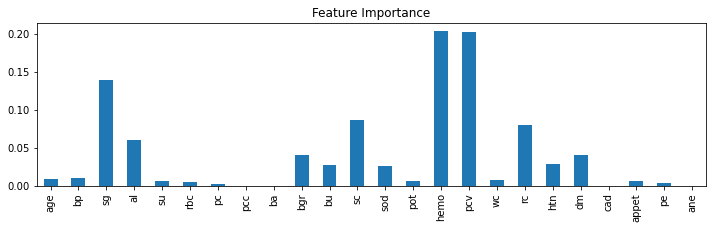

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
features = X_test_kdn.columns.values.tolist()
importance = rfc.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')


# 5. Validate the model

In [48]:
### Validation for the KNN classification.
knn_pred = knn.predict(X_test_kdn)

print(classification_report(y_test_kdn,knn_pred))

accuracy_score( y_test_kdn,pred_knn)

              precision    recall  f1-score   support

         ckd       1.00      0.93      0.97        75
      notckd       0.90      1.00      0.95        45

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



0.9583333333333334

In [49]:
### Validation for the random forest classification.
rfc_pred = rfc_fit.predict(X_test_kdn)

print(classification_report(y_test_kdn,rfc_pred))

accuracy_score( y_test_kdn, rfc_pred)

              precision    recall  f1-score   support

         ckd       0.99      0.99      0.99        75
      notckd       0.98      0.98      0.98        45

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



0.9833333333333333

# Last but not least :  AUTOMATE the process as much as possible !

- Write the Python functions implementing the workflow in one
single .py file.
- Apply the workflow onto the two datasets, using either a
Python script or a notebook.
- Important: Your .py file containing the functions must be the
same when applied to one or the other dataset

Faire des fonctions générales pour chaque partie qui prennent un dataset en entrée et resorte ce qu'il faut à chaque étape 1.,2., ..., 5.